In [ ]:
# 구글드라이브와 연결후 드라이브에 폴더 업로드함
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# 디렉토리 확인함
import os

img_dir = '/content/drive/MyDrive/Colab Notebooks/mydrive/data'
os.listdir(img_dir)

['.DS_Store', 'Free', 'Full']

In [ ]:
# skimage imagecollection 통해서 해당위치에 있는 이미지파일들을 가져옴
import skimage.io as io
Free_images = io.ImageCollection('/content/drive/MyDrive/Colab Notebooks/mydrive/data/Free/*')
Full_images = io.ImageCollection('/content/drive/MyDrive/Colab Notebooks/mydrive/data/Full/*')

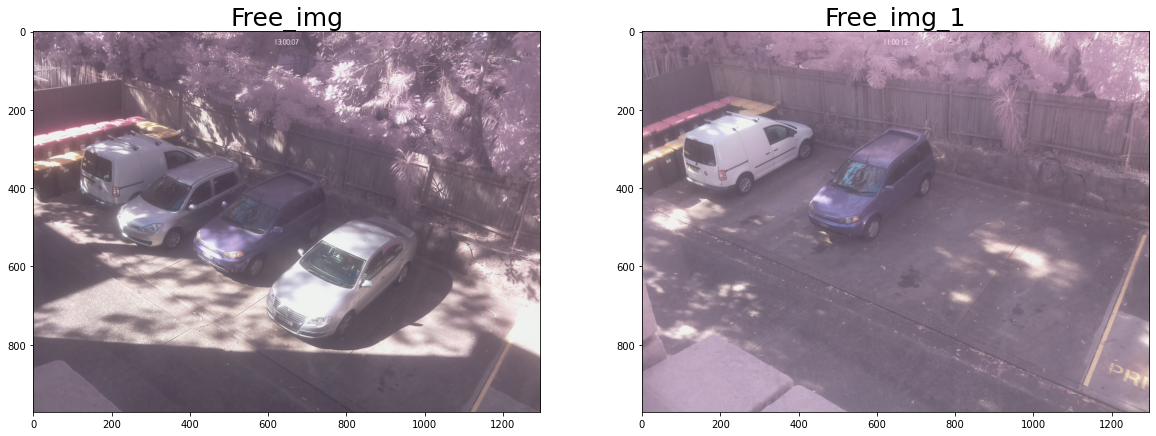

In [ ]:
import matplotlib.pyplot as plt

# Free_images 의 이미지 중 하나를 시각화 
plt.figure(figsize=(20,20))
free_img = Free_images[100]
plt.subplot(1,2,1)
plt.title('Free_img', fontsize=25)
plt.imshow(free_img)

free_img_1 = Free_images[50]
plt.subplot(1,2,2)
plt.title('Free_img_1', fontsize=25)
plt.imshow(free_img_1);

# 비어있는 공간이 어디가 비어있는지는 라벨링이 되어 있지는 않음
# 어느 공간이 비어있는지는 알 수 없지만 feature activation map을 통해서 어느 공간이 비어있는지를 시각화 해볼 예정

In [ ]:
print(free_img.shape)     # 하나의 free_img shape 확인
print(len(Free_images))   # 전체 Free 이미지 갯수 확인

(972, 1296, 3)
1067


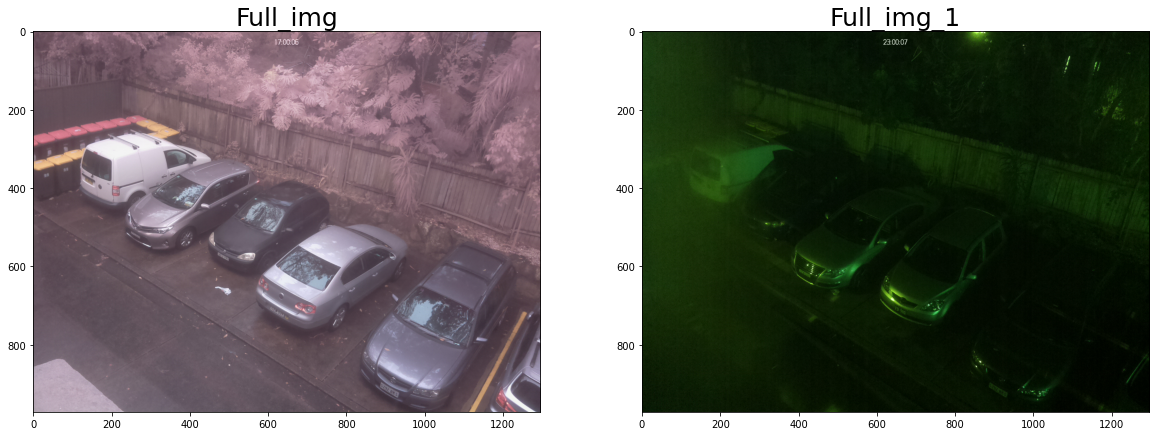

In [ ]:
# Full_images 의 이미지 중 하나를 시각화 
plt.figure(figsize=(20,20))

full_img = Full_images[99]
plt.subplot(1,2,1)
plt.title('Full_img', fontsize=25)
plt.imshow(full_img)

full_img_1 = Full_images[100]
plt.subplot(1,2,2)
plt.title('Full_img_1', fontsize=25)
plt.imshow(full_img_1);

In [ ]:
print(full_img.shape)     # 하나의 Full_img shape 확인
print(len(Full_images))   # 전체 Full 이미지 갯수 확인

(972, 1296, 3)
2195


#MobileNet2 Fine Tuning

In [ ]:
import tensorflow as tf
import random
import numpy as np

from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import RMSprop, SGD, Adam, Nadam
from keras.callbacks import ModelCheckpoint, EarlyStopping

random.seed(1)
tf.random.set_seed(1)
np.random.seed(1)
os.environ["PYTHONHASHSEED"] = str(1)
os.environ['TF_DETERMINISTIC_OPS'] = str(1)

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

In [ ]:
from keras.models import Model, load_model

base_model = MobileNetV2(input_shape=(224,224,3),  
                         weights='imagenet',
                         include_top=False)


In [ ]:
for layer in base_model.layers[:-10]:  # 마지막 10개의 레이어 제외하고 동결
    layer.trainable = False

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x) 
output = Dense(2, 
               activation='softmax')(x)

model = Model(inputs=base_model.input,
              outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [ ]:
# Train the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('MobileNetV2_04_2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit_generator(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    callbacks = [es, mc])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
92/92 [==============================] - 233s 2s/step - loss: 0.4245 - acc: 0.8392 - val_loss: 0.1634 - val_acc: 0.9569

Epoch 00001: val_acc improved from -inf to 0.95692, saving model to MobileNetV2_04_2.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
92/92 [==============================] - 216s 2s/step - loss: 0.1230 - acc: 0.9569 - val_loss: 2.0103 - val_acc: 0.6185

Epoch 00002: val_acc did not improve from 0.95692
Epoch 3/10
92/92 [==============================] - 216s 2s/step - loss: 0.0949 - acc: 0.9635 - val_loss: 4.5176 - val_acc: 0.3662

Epoch 00003: val_acc did not improve from 0.95692
Epoch 4/10
92/92 [==============================] - 222s 2s/step - loss: 0.0698 - acc: 0.9768 - val_loss: 5.0715 - val_acc: 0.3723

Epoch 00004: val_acc did not improve from 0.95692
Epoch 5/10
92/92 [==============================] - 220s 2s/step - loss: 0.0761 - acc: 0.9745 - val_loss: 9.7970 - val_acc: 0.3292

Epoch 00005: val_acc did not improve from 0.95692
Epoch 6/10
92/92 [==============================] - 219s 2s/step - loss: 0.0726 - acc: 0.9752 - val_loss: 13.7761 - val_acc: 0.3262

Epoch 00006: val_acc did not improve from 0.95692
Epoch 00006: early stopping


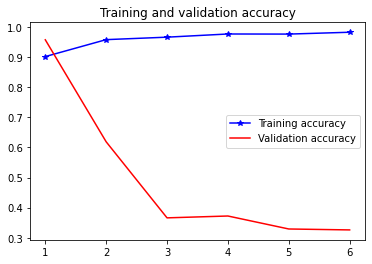

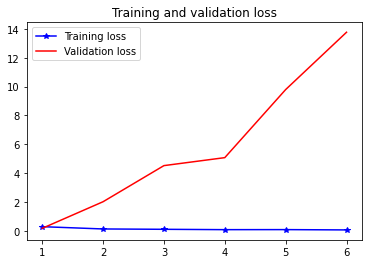

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'b*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model = load_model('MobileNetV2_04_2.h5')

last_weight = model.layers[-1].get_weights()[0] # (1280, 2)

new_model = Model(inputs=model.input,
                  outputs=(model.layers[-3].output, 
                           model.layers[-1].output)) 

new_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

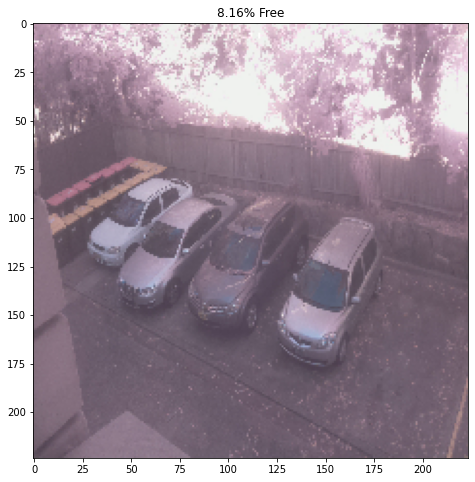

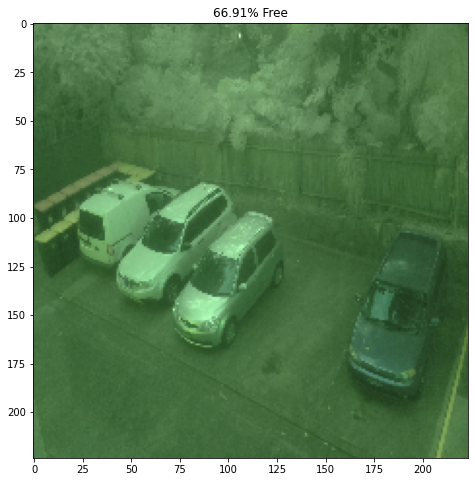

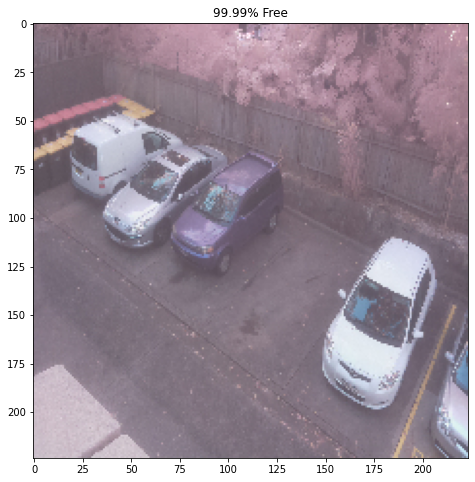

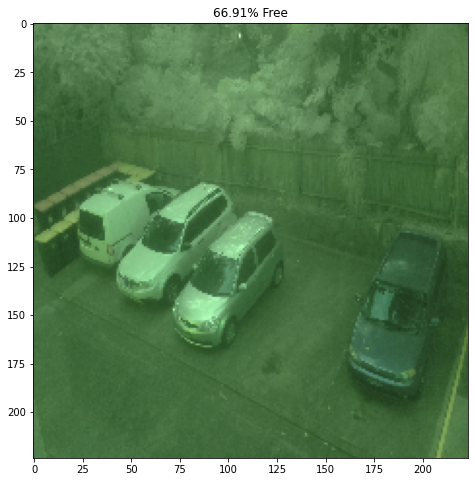

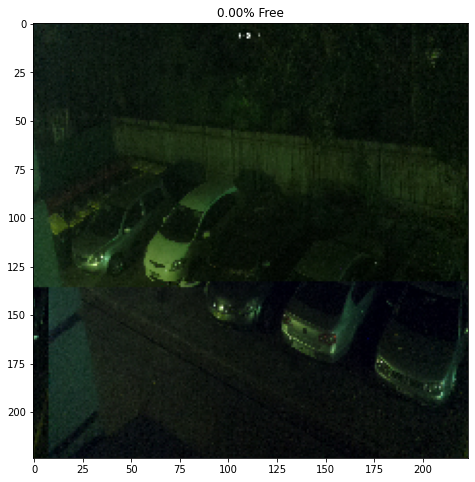

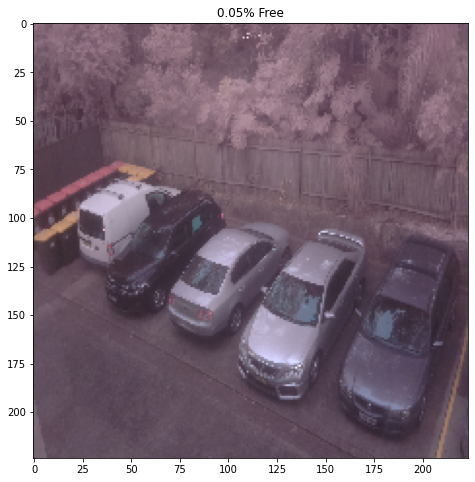

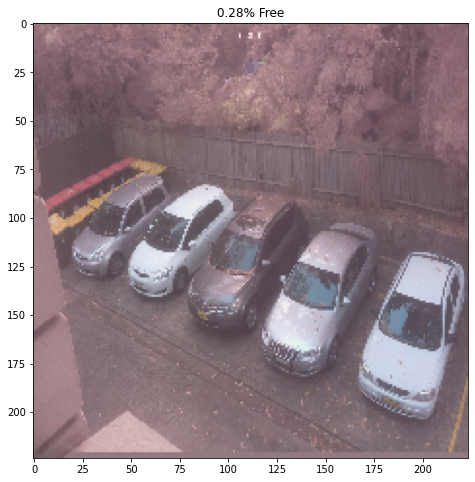

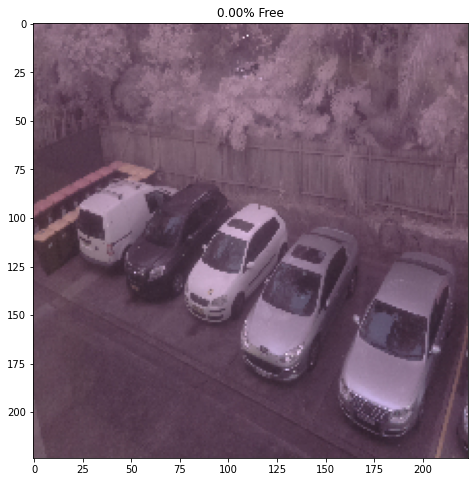

In [ ]:
import numpy as np

parking_list=['Free/img_129173058.jpg',
              'Free/img_815061601.jpg',
              'Free/img_723080007.jpg',
              'Free/img_815061601.jpg',
              'Full/img_127040601.jpg',
              'Full/img_809172559.jpg',
              'Full/img_129063058.jpg',
              'Full/img_822174600.jpg']

for parking in parking_list:
    test_img = img_to_array(load_img(os.path.join(img_dir, parking), target_size=(224, 224)))
    test_input = preprocess_input(np.expand_dims(test_img.copy(), axis=0)) # 사진 전처리
    pred = model.predict(test_input) # 예측
    
    plt.figure(figsize=(8,8))
    plt.title('%.2f%% Free' % (pred[0][1]*100))
    plt.imshow(test_img.astype(np.uint8))

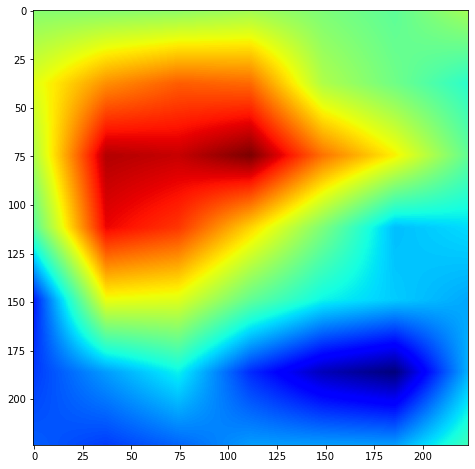

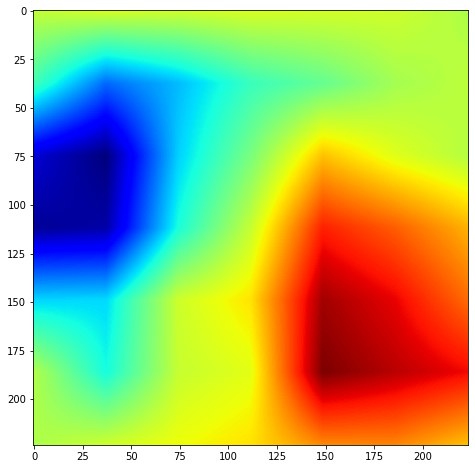

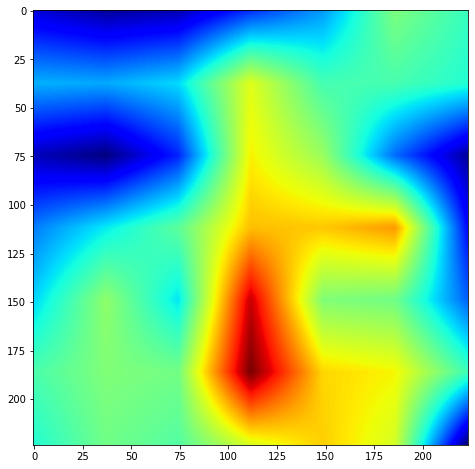

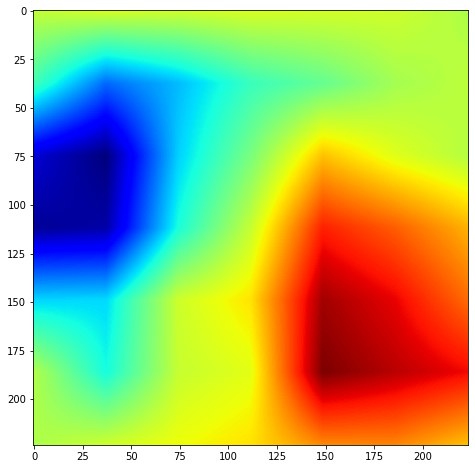

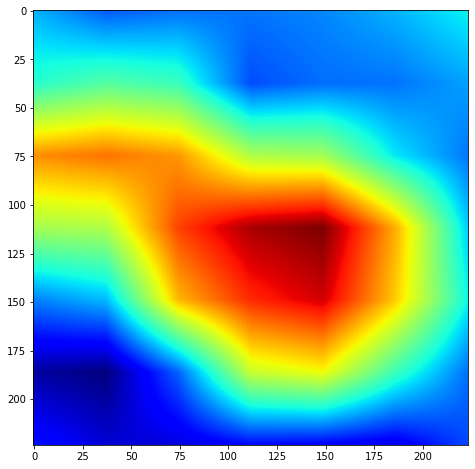

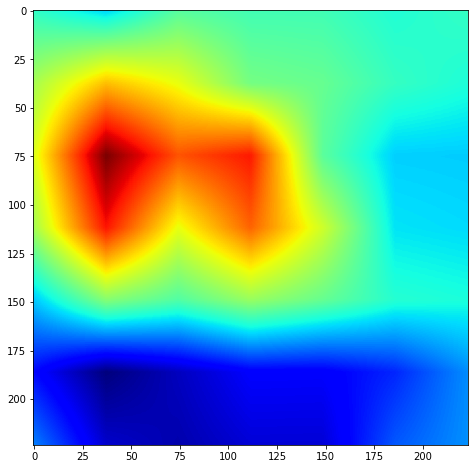

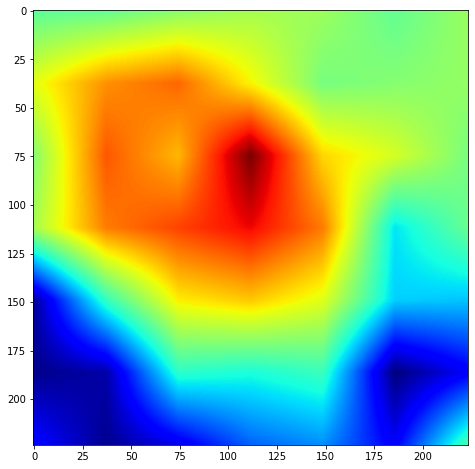

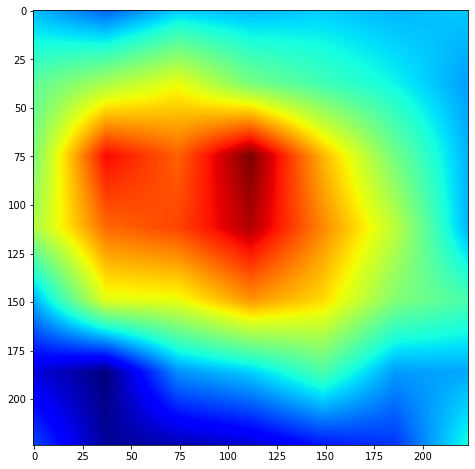

In [ ]:
import scipy

for parking in parking_list:
    test_img = img_to_array(load_img(os.path.join(img_dir, parking), target_size=(224, 224)))
    test_input = preprocess_input(np.expand_dims(test_img.copy(), axis=0))
    pred = model.predict(test_input)
    
    # Activation Map 코드
    last_conv_output, pred = new_model.predict(test_input)

    last_conv_output = np.squeeze(last_conv_output) # (7,7, 1280)
    feature_activation_maps = scipy.ndimage.zoom(last_conv_output, (32, 32, 1), order=1) # 이미지를 확대해줌 32배
    # (7,7,1280) -> (224,224,1280)

    pred_class = np.argmax(pred) # 0: Full, 1:Free
    predicted_class_weights = last_weight[:, pred_class] # (1280, 1)

    final_output = np.dot(feature_activation_maps.reshape((224*224,1280)), predicted_class_weights).reshape(224,224)
    # (224*224, 1280) dot_product(1280, 1) = (224*224, 1)
    
    plt.figure(figsize=(8,8))
    plt.imshow(final_output, cmap='jet')

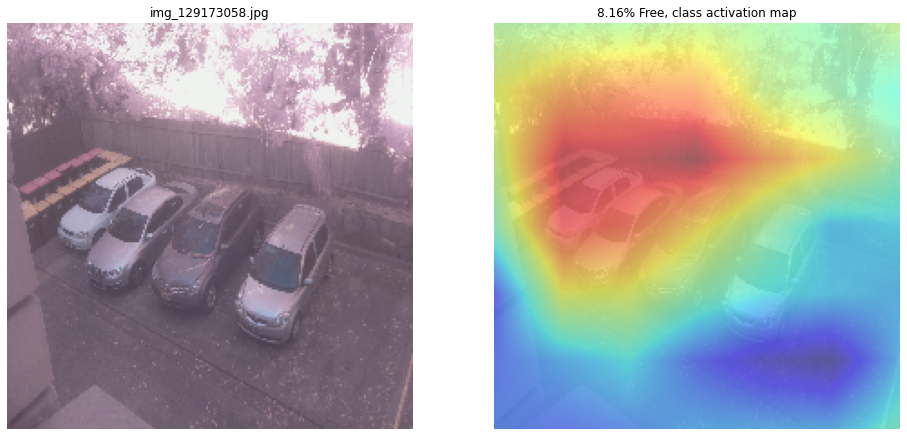

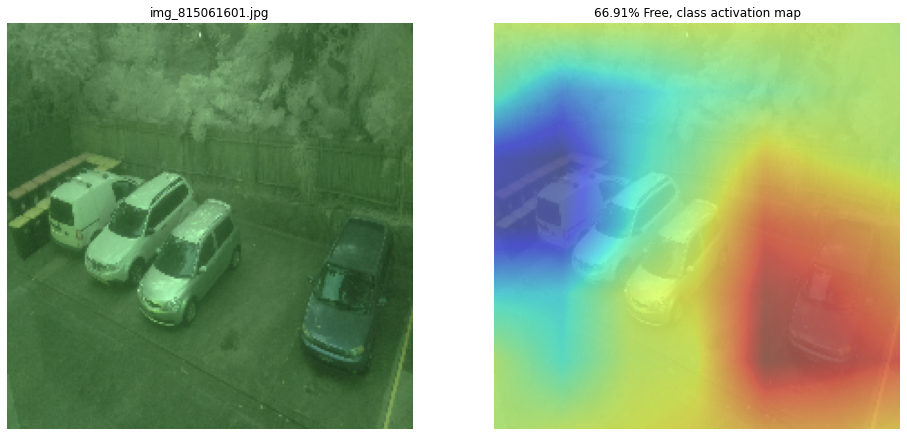

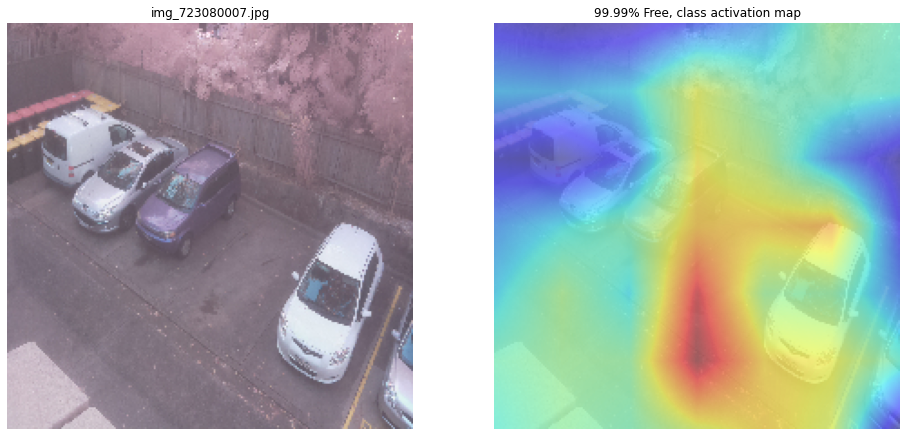

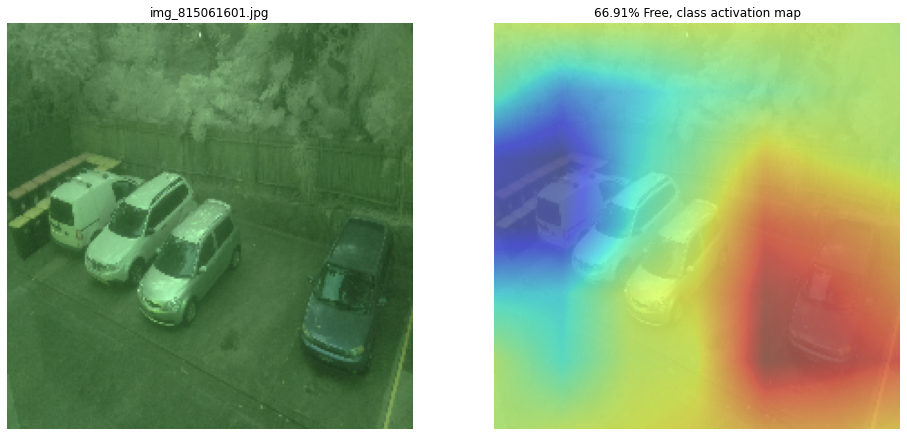

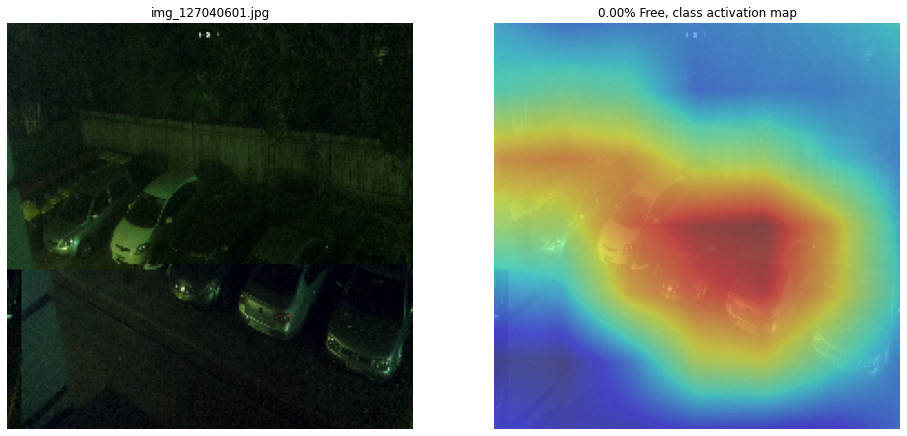

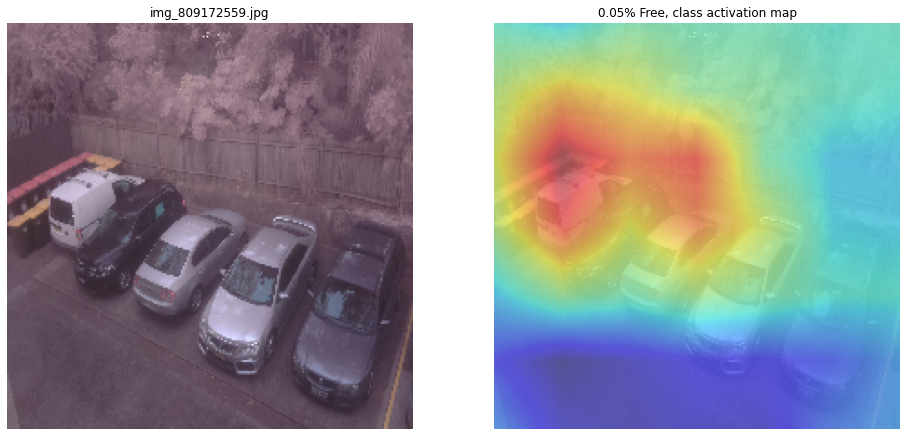

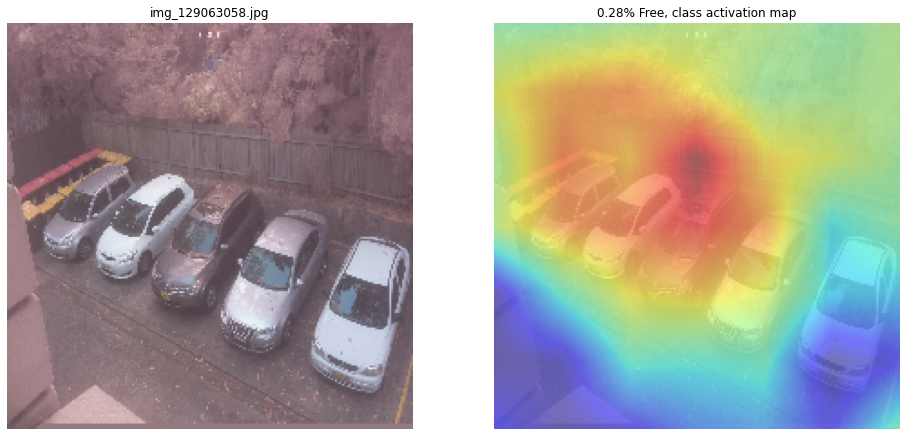

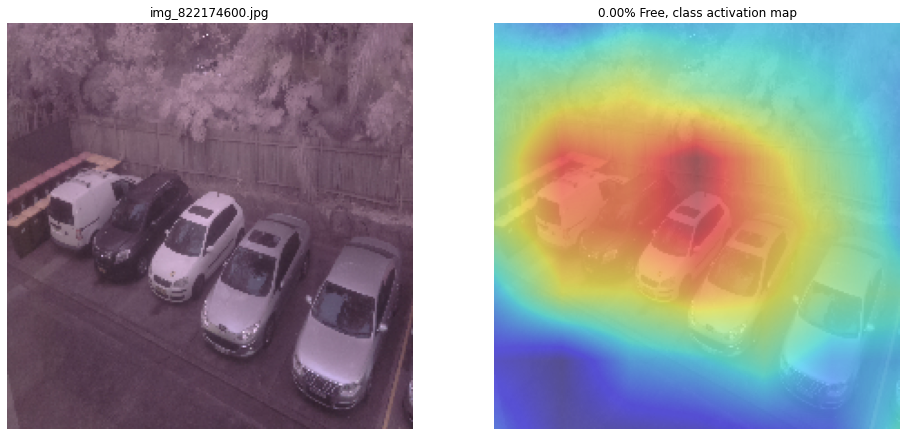

In [ ]:
for parking in parking_list:
    test_img = img_to_array(load_img(os.path.join(img_dir, parking), target_size=(224, 224)))
    test_input = preprocess_input(np.expand_dims(test_img.copy(), axis=0))
    pred = model.predict(test_input)

    last_conv_output, pred = new_model.predict(test_input)

    last_conv_output = np.squeeze(last_conv_output) # (7,7, 1280)
    feature_activation_maps = scipy.ndimage.zoom(last_conv_output, (32, 32, 1), order=1) 
    # (7,7,1280) -> (224,224,1280)

    pred_class = np.argmax(pred) # 0: Full, 1:Free
    predicted_class_weights = last_weight[:, pred_class] # (1280, 1)

    final_output = np.dot(feature_activation_maps.reshape((224*224,1280)), predicted_class_weights).reshape(224,224)
    # (224*224, 1280) dot_product(1280, 1) = (224*224, 1)
    
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(16, 20)

    ax[0].imshow(test_img.astype(np.uint8))
    ax[0].set_title(parking.split('/')[1])
    ax[0].axis('off')

    ax[1].imshow(test_img.astype(np.uint8), alpha=0.5)
    ax[1].imshow(final_output, cmap='jet', alpha=0.5)
    ax[1].set_title('%.2f%% Free, class activation map' % (pred[0][1]*100))
    ax[1].axis('off')
    plt.show()